In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [64]:
def calc_freq_Z_tot(data, Z_0):
    freq = data[:, 0]
    Z_tot = (1 + data[:, 1] + 1j * data[:, 2]) / (1 - data[:, 1] - 1j * data[:, 2]) * Z_0
    return freq, Z_tot

logをとってしまった状態でフィッティングしたほうが良いと寺山さんがおっしゃっていました

In [65]:
def RLC_ser_with_stray(freq, L, C, R, C_2, R_2):
    omega = 2 * np.pi * freq
    Z_L = (1 / (1j * omega * L + R_2) + 1j * omega * C_2) ** (-1)
    Z_R = R
    Z_C = 1 / (1j * omega * C)
    return Z_L + Z_R + Z_C


def RLC_ser_with_stray_abs(freq, L, C, R, C_2, R_2):
    Z = RLC_ser_with_stray(freq, L, C, R, C_2, R_2)
    z_abs = np.array(abs(Z), dtype=np.float64)
    return z_abs


def RLC_ser_with_stray_abs_log(freq, L, C, R, C_2, R_2):
    return np.log(RLC_ser_with_stray_abs(freq, L, C, R, C_2, R_2))


[ 4.10166572e-06  1.69123521e-10 -5.75490677e+00  3.58640433e-11
  4.95071806e+00]


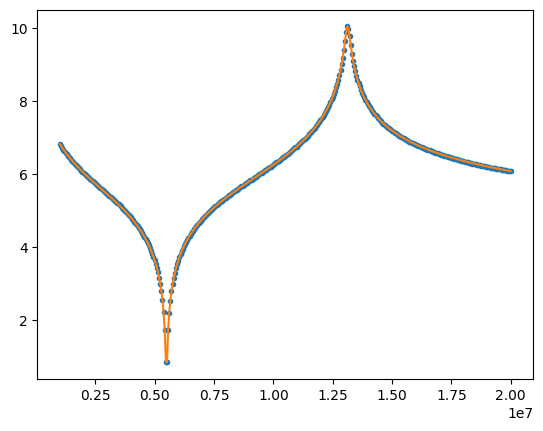

In [66]:
data = np.loadtxt("../data/coil+dee(serial)_1-20MHz_2026_02_04.s1p",delimiter=' ')
freq,Z_tot = calc_freq_Z_tot(data,50)

Z_abs_log = np.log(np.abs(Z_tot))

popt,pcov = curve_fit(RLC_ser_with_stray_abs_log,freq,Z_abs_log,p0=(6e-6,30e-12,10,30e-12,10))
plt.plot(freq,Z_abs_log,'.',label='data')
plt.plot(freq,RLC_ser_with_stray_abs_log(freq,*popt),label='fit')

print(popt)


この計算についてはノートを参照してください。

In [67]:
def calc_freq_Z_L_Z_C(data, Z_0):
    freq = data[:, 0]
    s11 = data[:, 1] + 1j * data[:, 2]
    s21 = data[:, 3] + 1j * data[:, 4]
    Z_L = ((1 + s11) / s21 - 1) * Z_0
    Z_C = (1 + s11) / (1 - s11 - s21) * Z_0
    return freq, Z_L, Z_C

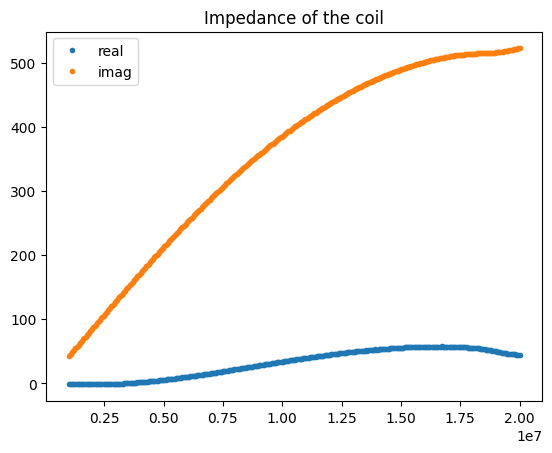

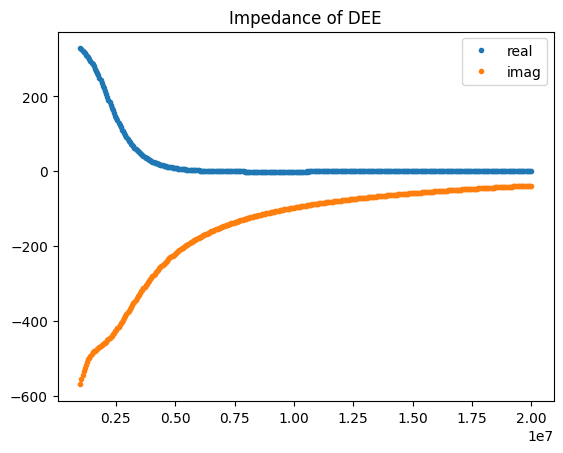

In [68]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port1.s2p",delimiter=' ')
freq,Z_L,Z_C = calc_freq_Z_L_Z_C(data,50)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()


入力電圧に対するDEEの電圧の比は以下のようにかけるはず

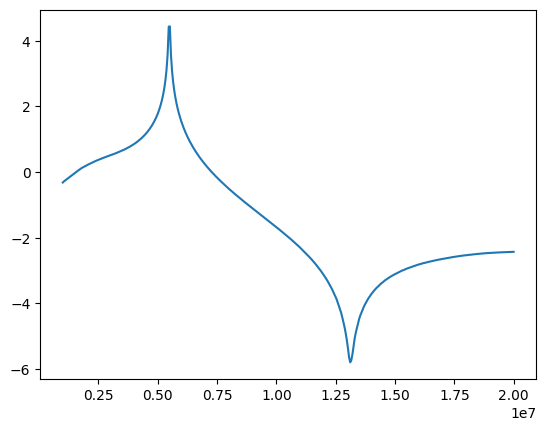

In [69]:
plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot)))

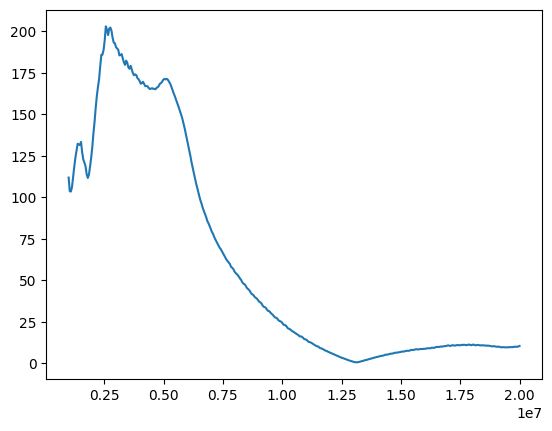

In [72]:
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(Z_tot.real))